<img src="https://www.python.org/static/img/python-logo.png" width="300" alt="Python logo"  />
<font color='blue'>
$\Large\text{Pontificia Universidad Católica del Perú}$</font>

$$\Large \textit{Estadística Aplicada}$$

$$\large\textbf{Trabajo Clase 12: Analisis de Varianza}$$

Nombe alumno: Ana Muñoz Maquera



Caso de estudio: **"Base presion arterial"**

Haciendo uso de la base entregada desarrollar los siguientes items:


Total de puntos (20 ptos)

**Caso de análisis:** Se quiere evaluar la eficacia de distintas dosis de un fármaco contra la hipertensión arterial, comparándola con la de una dieta sin sal. Para ello se seleccionan al azar 100 hipertensos y se distribuyen aleatoriamente en 5 grupos (A,B,C,D,E). 
*   Al primero de ellos no se le suministra ningún tratamiento (A)
*   Al segundo una dieta con un contenido pobre en sal (B)
*   Al tercero una dieta sin sal (C)
*   Al cuarto el fármaco a una dosis determinada (D)
*   Al quinto el mismo fármaco a otra dosis  (E)


### **Paso 1**
1. Carga y muestreo. **(4ptos)**
  *   Cargar la base de datos para la actividad. 
  *   Calcula el número de observaciones por grupo
  *   Calcula la media y desviación típica por grupo
  *   Construir el gráfico de cajas por grupo
  *   Interpreta todos los resultados obtenidos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install pingouin
import pingouin as pg

In [ ]:
# cargando base
df = pd.read_csv('/content/Presion_arterial4.csv')

In [ ]:
# Nro de observaciones por grupo
df.groupby(by='tipo_dosis', as_index=False).size()

,tipo_dosis,size
0,A,20
1,B,20
2,C,20
3,D,20
4,E,20


In [ ]:
# media y desviacion por grupo
df.groupby(by='tipo_dosis', as_index=False).agg(mean=('presion_arterial','mean'), std=('presion_arterial','std'))

,tipo_dosis,mean,std
0,A,178.2335,4.304988
1,B,166.2765,3.730280
2,C,163.0880,4.023360
3,D,157.4220,3.429483
4,E,150.6260,2.801384


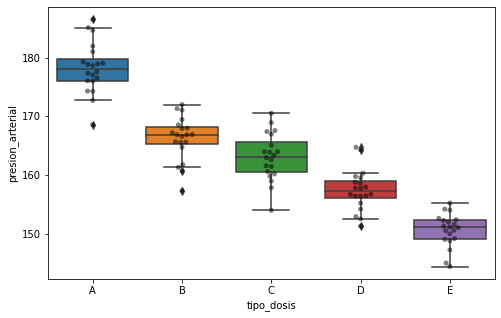

In [ ]:
# Boxplots
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.boxplot(x="tipo_dosis", y="presion_arterial", data=df, ax=ax)
sns.swarmplot(x="tipo_dosis", y="presion_arterial", data=df, color='black', alpha = 0.5, ax=ax);

**Conclusiones**
* La proporcion de grupos es la misma para cada tipo de dosis
* La varianza no es tan alta oscila entre 3 y 4
* Se encontraron algunos valores outliders en la prsion arterial segun los tipos de dosis 
* La presion arterial promedio es mas alta en el grupo A y va reduciendose haste l grupo E

### **Paso 2**
2. Verifica los supuestos **(8 ptos)**
  *   Verifica el supuesto de independencia
  *   Verifica el supuesto de normalidad de las observaciones (gráfico qqplot y test Shapiro-Wilk)
  *   Verifica el supuesto de homocedasticidad
  *   Interpreta los resultados obtenidos

Los grupos de tipo de dosis son independientes entre ellos ya que se ha hecho un muestreo aleatorio de 100 hipertensos en 5 grupos

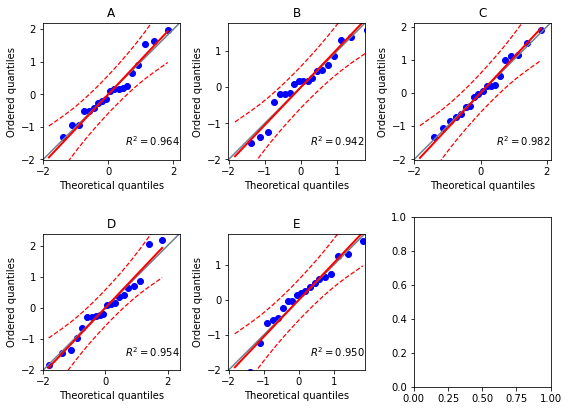

In [ ]:
# supuesto de normalidad por grupo con qplot

fig, axs = plt.subplots(2, 3, figsize=(8, 6))
pg.qqplot(df.query('tipo_dosis == "A"').presion_arterial, dist='norm', ax=axs[0,0])
axs[0,0].set_title('A')
pg.qqplot(df.query('tipo_dosis == "B"').presion_arterial, dist='norm', ax=axs[0,1])
axs[0,1].set_title('B')
pg.qqplot(df.query('tipo_dosis == "C"').presion_arterial, dist='norm', ax=axs[0,2])
axs[0,2].set_title('C')
pg.qqplot(df.query('tipo_dosis == "D"').presion_arterial, dist='norm', ax=axs[1,0])
axs[1,0].set_title('D')
pg.qqplot(df.query('tipo_dosis == "E"').presion_arterial, dist='norm', ax=axs[1,1])
axs[1,1].set_title('E')
plt.tight_layout()

In [ ]:
# Test de normalidad Shapiro-Wilk
# Ho = TODAS LAS VARIABLES SE DISTIBUYEN DE MANERA NORMAL
pg.normality(data=df, dv='presion_arterial', group='tipo_dosis')

,W,pval,normal
tipo_dosis,,,
A,0.970711,0.769819,True
B,0.943547,0.279537,True
C,0.985744,0.985714,True
D,0.956007,0.467472,True
E,0.950324,0.372032,True


In [ ]:
# Test de homocedasticidad
# Ho = TODAS LAS VARIANZAS DE LAS VARIABLES SON IGUALES
pg.homoscedasticity(data=df, dv='presion_arterial', group='tipo_dosis', method='levene')

,W,pval,equal_var
levene,0.707534,0.588741,True


**Conclusion**
* Segun el grafico qqplot los tipos de dosis al parecer cumplen la distribucion normal
* El test de Shapiro-Wilk confirma la normalidad pues el p value sale mucho mayor que el 0.05 y por lo tanto la Ho es verdadera
* El test de homocedasticidad en los tipo de dosis nos indica que sus varianzas son iguales, con el test de levene obtenemosun p value de 0.58


### **Paso 3**
2. Realiza los test de comparación **(8ptos)**:

*   Realiza el test de ANOVA de una vía para definir si hay al menos una diferencia
*   Realiza el test de comparación multiple de Tukey para definir que grupos son los que se diferencian
*   Interpreta los resultados obtenidos



In [ ]:
# Test ANOVA de una vía (One-way ANOVA)
# Ho = Las muestras provienen de poblaciones con la misma media (medias iguales)

pg.anova(data=df, dv='presion_arterial', between='tipo_dosis', detailed=True)#.round(5)

,Source,SS,DF,MS,F,p-unc,np2
0,tipo_dosis,8538.984306,4,2134.746076,156.404387,6.708032e-41,0.868169
1,Within,1296.644430,95,13.648889,NaN,NaN,NaN


In [ ]:
# Post-hoc Tukey test
# Medias iguales en pares
pg.pairwise_tukey(data=df, dv='presion_arterial', between='tipo_dosis').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,178.234,166.276,11.957,1.168,10.235,0.000,2.910
1,A,C,178.234,163.088,15.145,1.168,12.964,0.000,3.563
2,A,D,178.234,157.422,20.811,1.168,17.814,0.000,5.241
3,A,E,178.234,150.626,27.607,1.168,23.631,0.000,7.450
4,B,C,166.276,163.088,3.188,1.168,2.729,0.057,0.806
5,B,D,166.276,157.422,8.855,1.168,7.579,0.000,2.422
6,B,E,166.276,150.626,15.650,1.168,13.396,0.000,4.650
7,C,D,163.088,157.422,5.666,1.168,4.850,0.000,1.486
8,C,E,163.088,150.626,12.462,1.168,10.667,0.000,3.523
9,D,E,157.422,150.626,6.796,1.168,5.817,0.000,2.127


**Conclusiones**
* Segun el test ANOVA no podria decir que todos los tipos de dosis tienen medias iguales, ya que el p value es mucho menor a 0.05 rechazando la Ho
* Revisando el test de Tukey los tipos de dosis B y C tienen un p value mayor a 0.05, entonce B y C tiene medias iguales y no podria comparar los resultados


## Conclusiones Generales

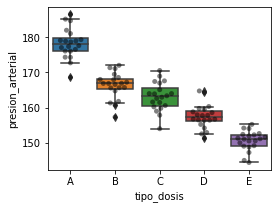

In [ ]:
# Boxplots
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.boxplot(x="tipo_dosis", y="presion_arterial", data=df, ax=ax)
sns.swarmplot(x="tipo_dosis", y="presion_arterial", data=df, color='black', alpha = 0.5, ax=ax);

* Puedo decir que la presion arterial aumenta con desde el tipo de dosis A y baja hasta el E
* Sin embargo, las dosis B y C no podria decir que una es mayor que otra pues tienen medias iguales estadisticamente.